# Plotting difference between 2000s and 1970s (10-year averages)
- Select multiple versions
- generate multi-panel plot

In [14]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import cartopy.crs as ccrs
import joblib

In [2]:
# Define which versions to plot
ver = ['1.1.4.1.1.1',
       '1.2.4.1.1.1',
       '2.1.4.1.1.1',
       '2.2.4.1.1.1']
note=['ship & RF','ship+Argo & RF','ship & NN','ship+Argo & NN']

In [3]:
diro='/glade/campaign/univ/ugit0034/ML4O2_results/O2map_v'

In [4]:
ds=xr.open_dataset(diro+ver[0]+'.nc')
#ds.dims

In [5]:
do2 = np.zeros((4,ds.dims['depth'],ds.dims['lat'],ds.dims['lon']))
#
for n,v in enumerate(ver):
    ds=xr.open_dataset(diro+v+'.nc')
    # contrast 70s vs 2000s
    delo2 = ds.o2est.sel(time=slice('2010-01','2020-01')).mean('time') \
            - ds.o2est.sel(time=slice('1970-01','1980-01')).mean('time')
    do2[n,:,:,:]=delo2.to_numpy()

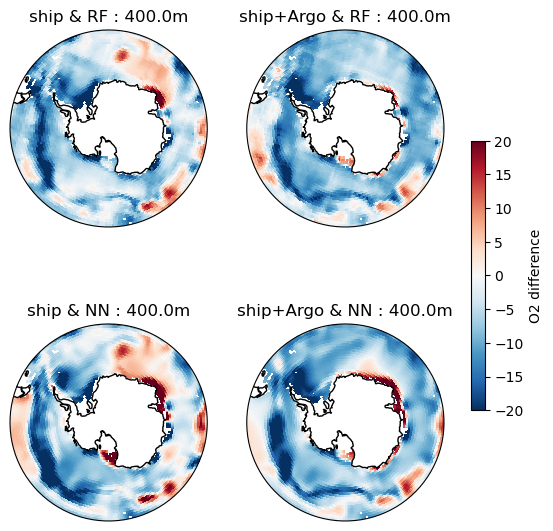

In [22]:
# select depth level
K = 13
z = ds.depth[K].to_numpy()
fig=plt.figure(figsize=(7,7))
ax=fig.subplots(2,2,subplot_kw={'projection': ccrs.Stereographic(central_longitude=0,central_latitude=-90)})
lon=ds.lon
lat=ds.lat
ax1=ax.flatten()
for n in range(4):
    ax1[n].set_extent([-180,180,-90,-50], ccrs.PlateCarree())
    im=ax1[n].pcolormesh(lon,lat,do2[n,K,:,:],cmap='RdBu_r',vmin=-20,vmax=20,transform=ccrs.PlateCarree())
    #ax1[n].set_xlim(0,160)
    #ax1[n].set_ylim(-60,40)
    ax1[n].coastlines()
    ax1[n].set_title(note[n]+' : '+str(z)+'m')
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1[n].set_boundary(circle, transform=ax1[n].transAxes)
plt.colorbar(im,ax=ax1[:],location='right',shrink=.5,label='O2 difference')
#plt.savefig('difference_plot.pdf',bbox_inches='tight')